In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


Data Loading :

In [2]:
df = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

In [3]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


Checking whether there is any NaN value present in the Dataset or not

In [4]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [5]:
X = df.drop('banking_crisis',axis=1)
X.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


In [6]:
y=df.banking_crisis
y.head()

0       crisis
1    no_crisis
2    no_crisis
3    no_crisis
4    no_crisis
Name: banking_crisis, dtype: object

Since cc3 and country columns are in string format, so we will convert them to integers first by using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.cc3 = le.fit_transform(X.cc3)
X.country = le.fit_transform(X.country)
X.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


Now, we will try to find Correlation between all the given features

In [8]:
Correlation = X.corr()
Correlation

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.964105,0.990553,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
cc3,0.964105,1.000000,0.946147,0.051679,-0.012692,-0.312222,0.134268,-0.082447,-0.007799,0.048917,0.012709,0.090759,0.003644
country,0.990553,0.946147,1.000000,0.134990,0.015586,-0.198953,0.155659,-0.000455,-0.041843,0.049184,0.013308,0.097166,0.016491
year,0.115574,0.051679,0.134990,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,-0.012692,0.015586,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,-0.312222,-0.198953,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.134268,0.155659,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,-0.082447,-0.000455,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.007799,-0.041843,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.048917,0.049184,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060


Let's visualize it more clearly through Heatmap

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

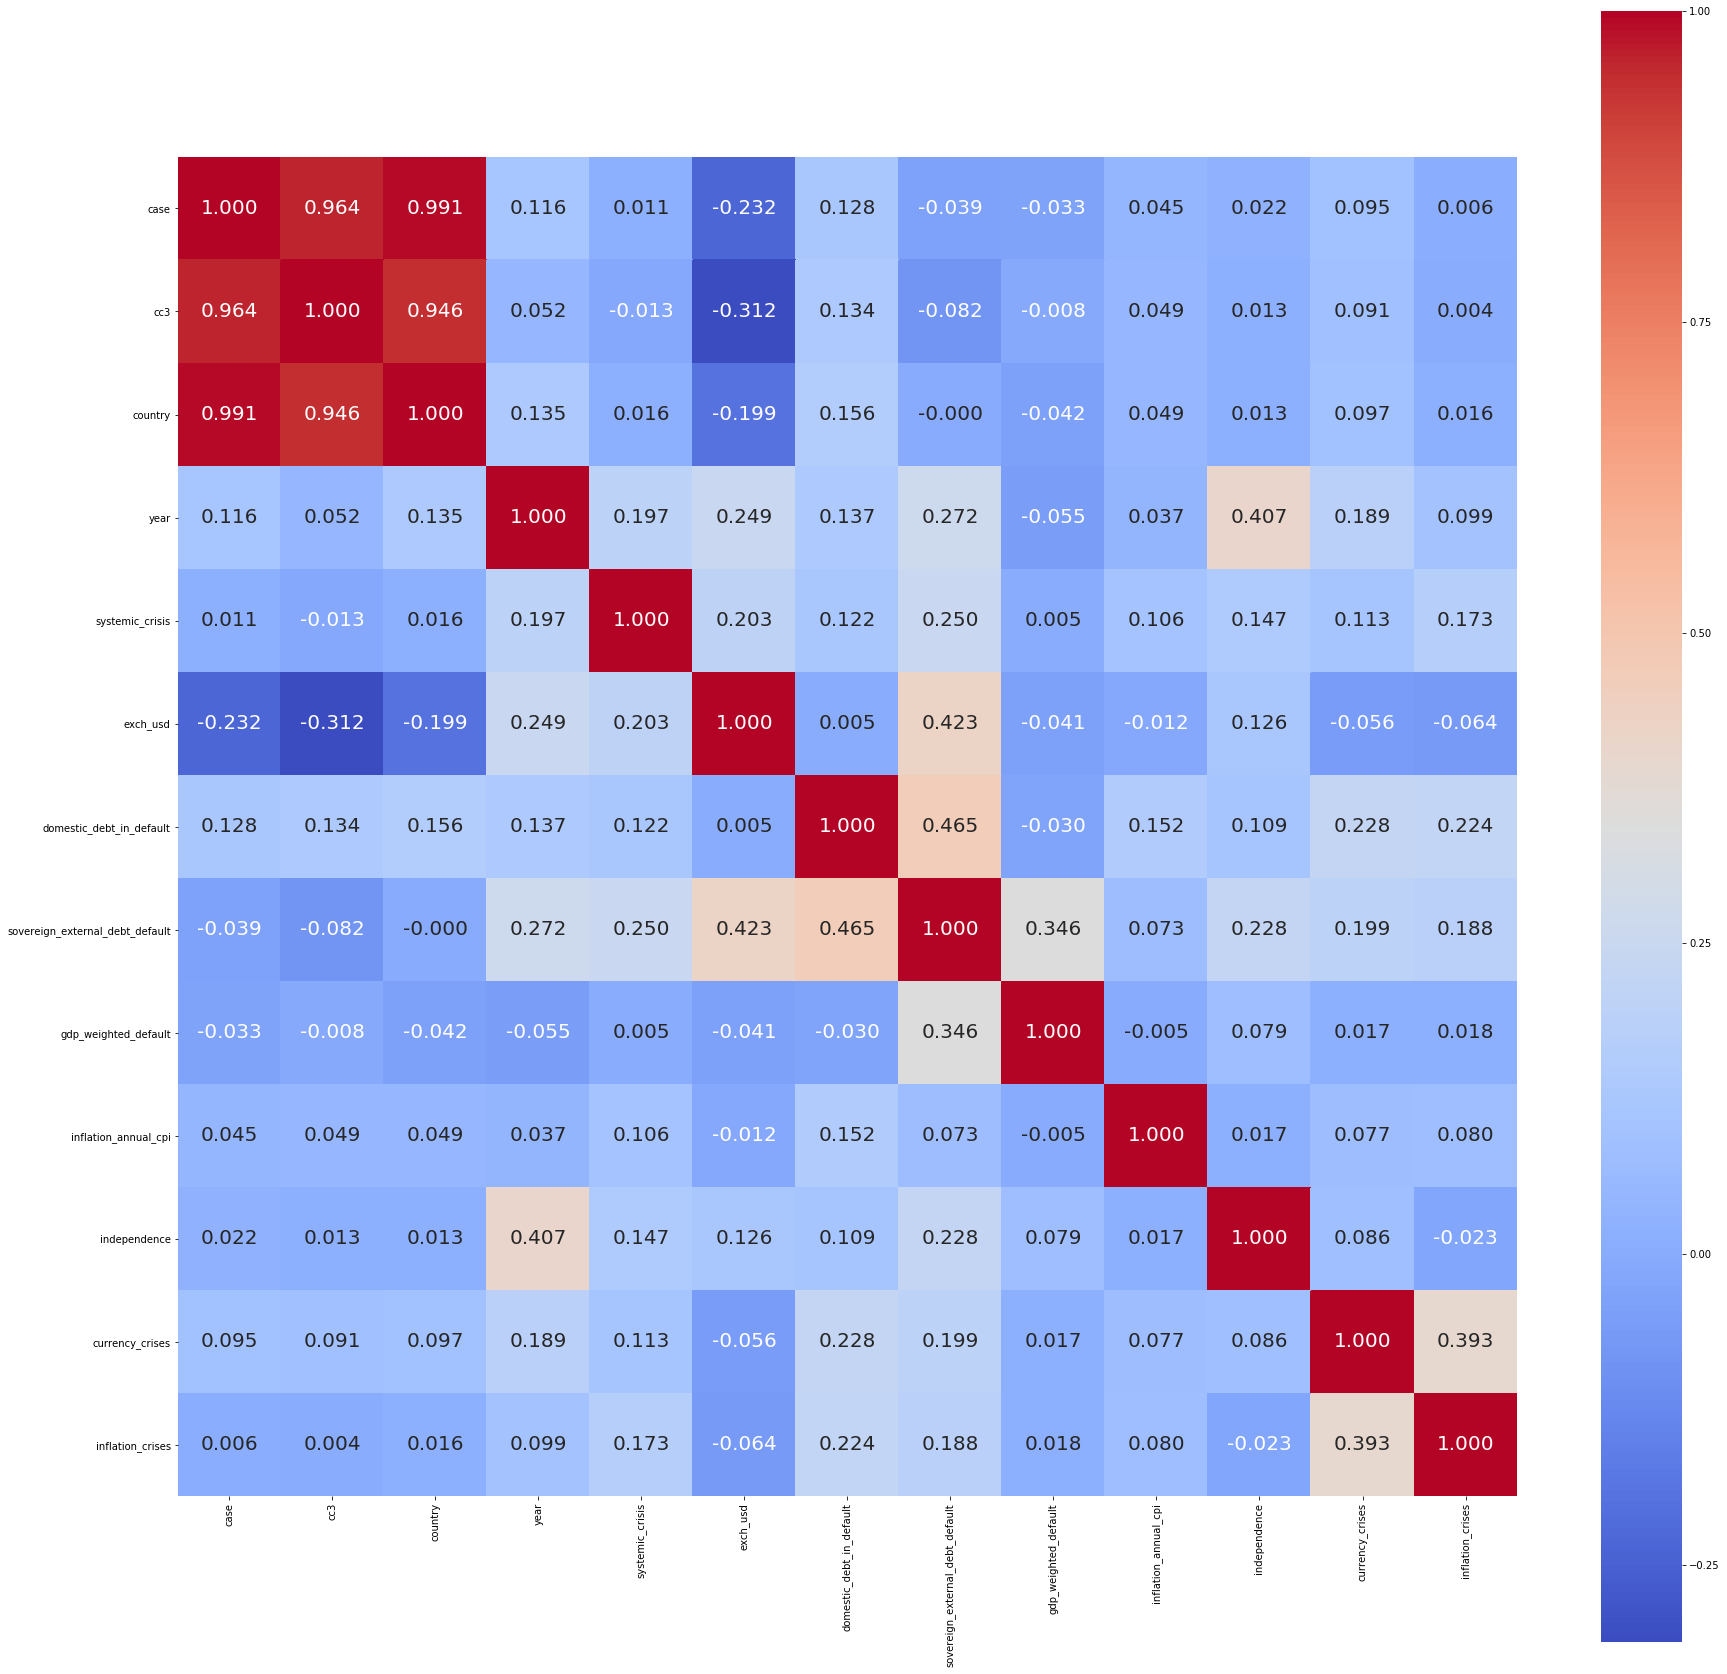

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(Correlation,cmap='coolwarm',annot=True,square=True, fmt ='.3f',annot_kws={'size' : 20})

From this Heatmap, it is clearly visible that there is a strong correlation between features :

1. cc3 and case
2. country and case
3. cc3 and country

We can observe that all the 3 features i.e. cc3,case and country are strongly correlated with each other. So, we will keep only 1 feature from these 3 features. I'll choose country and drop another cc3 and case.

In [11]:
X.drop(['cc3','case'],axis=1,inplace=True)
X.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


Now, X and y are ready for us. Let's split the data into Train and Test.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

I'll train the model with 75% of data and test the model with 25% of data.

Let's apply Random Forest Algorithm on the above scenario

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier()

# Training the Algorithm
model.fit(X_train,y_train)

# Testing the Algorithm
y_pred = model.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Checking the Accuracy of the model :

In [14]:
Accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy : ',Accuracy,'%')
print('Confusion Matrix : \n')
confusion_matrix(y_test,y_pred)

Accuracy :  98.86792452830188 %
Confusion Matrix : 



array([[ 26,   3],
       [  0, 236]])

Hence, we have achieved an Accuracy of : 98.86792452830188 %

Hope it would be helpful for you. Thank You for watching. Cheers !